In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("data/supermarket_sales.csv")

In [13]:
# Primeras filas
df.head()

# Estadísticas descriptivas
df.describe()

# Ver valores nulos
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [15]:
# Eliminar filas duplicadas (si existen)
df = df.drop_duplicates()

# Convertir columna de fecha a datetime
df["Date"] = pd.to_datetime(df["Date"])

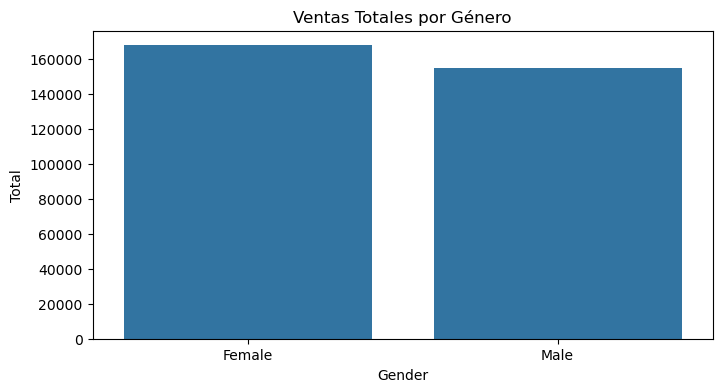

In [19]:
# Ventas totales por género
ventas_por_genero = df.groupby("Gender")["Total"].sum().reset_index()

# Gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x="Gender", y="Total", data=ventas_por_genero)
plt.title("Ventas Totales por Género")
plt.savefig("images/ventas_genero.png")  # Crea una carpeta "images" primero
plt.show()

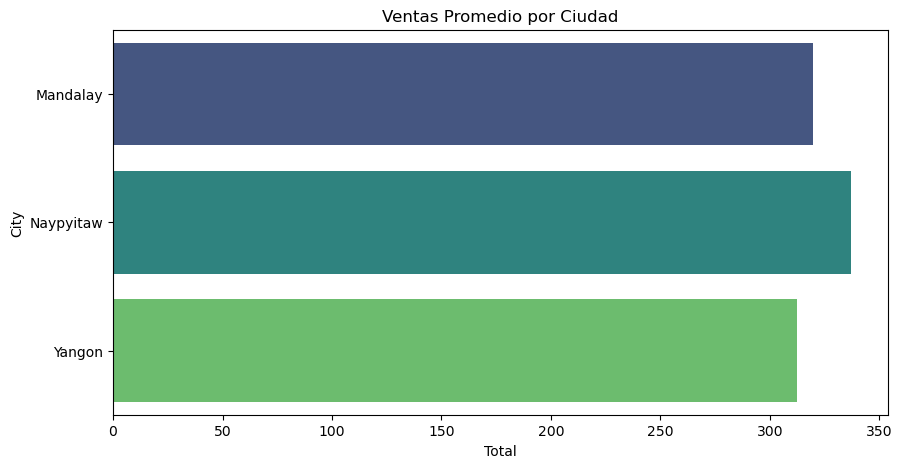

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Total", 
    y="City", 
    data=ventas_ciudad, 
    hue="City", 
    palette="viridis", 
    legend=False
)
plt.title("Ventas Promedio por Ciudad")
plt.savefig("images/ventas_ciudad.png")
plt.show()

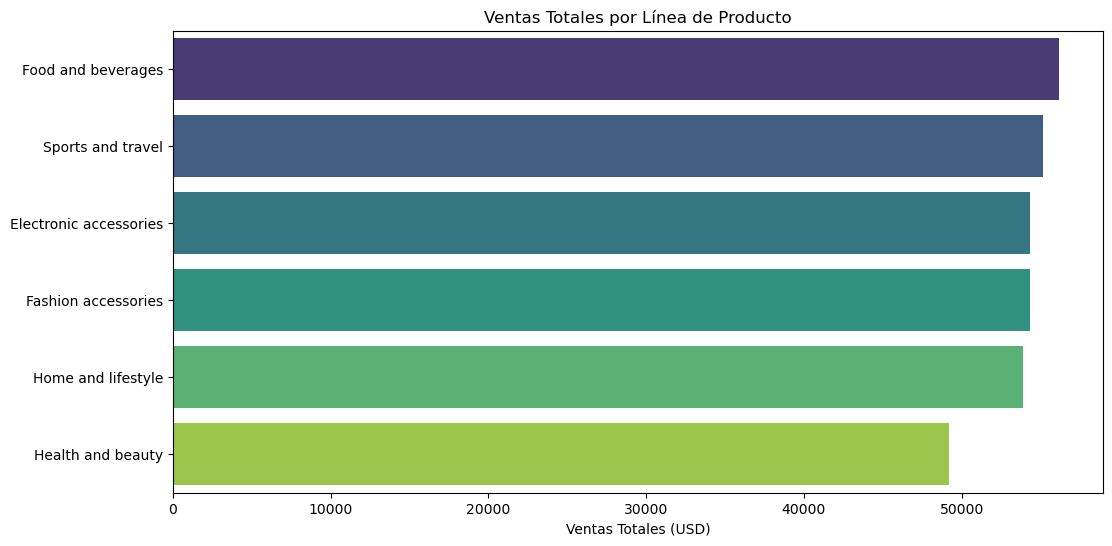

In [27]:
# Agrupar por producto
ventas_por_producto = df.groupby("Product line")["Total"].sum().reset_index().sort_values("Total", ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Total", 
    y="Product line", 
    data=ventas_por_producto, 
    hue="Product line",  # Corrección para evitar warnings
    palette="viridis", 
    legend=False
)
plt.title("Ventas Totales por Línea de Producto")
plt.xlabel("Ventas Totales (USD)")
plt.ylabel("")
plt.savefig("images/ventas_producto.png")
plt.show()

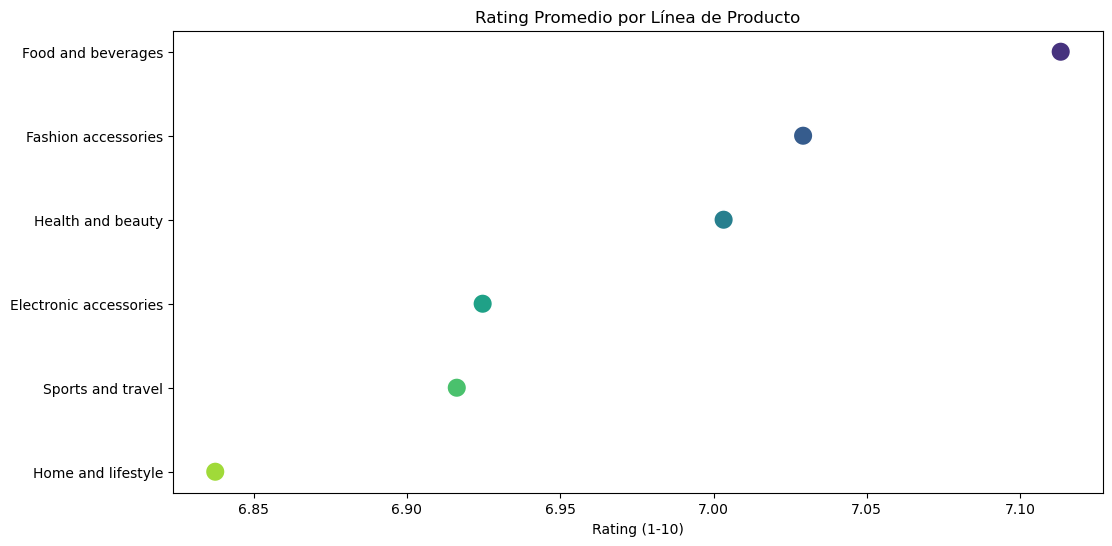

In [29]:
# Rating promedio por producto
rating_producto = df.groupby("Product line")["Rating"].mean().reset_index().sort_values("Rating", ascending=False)

# Gráfico de puntos
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="Rating", 
    y="Product line", 
    data=rating_producto, 
    hue="Product line", 
    palette="viridis", 
    s=200,
    legend=False
)
plt.title("Rating Promedio por Línea de Producto")
plt.xlabel("Rating (1-10)")
plt.ylabel("")
plt.savefig("images/rating_producto.png")
plt.show()

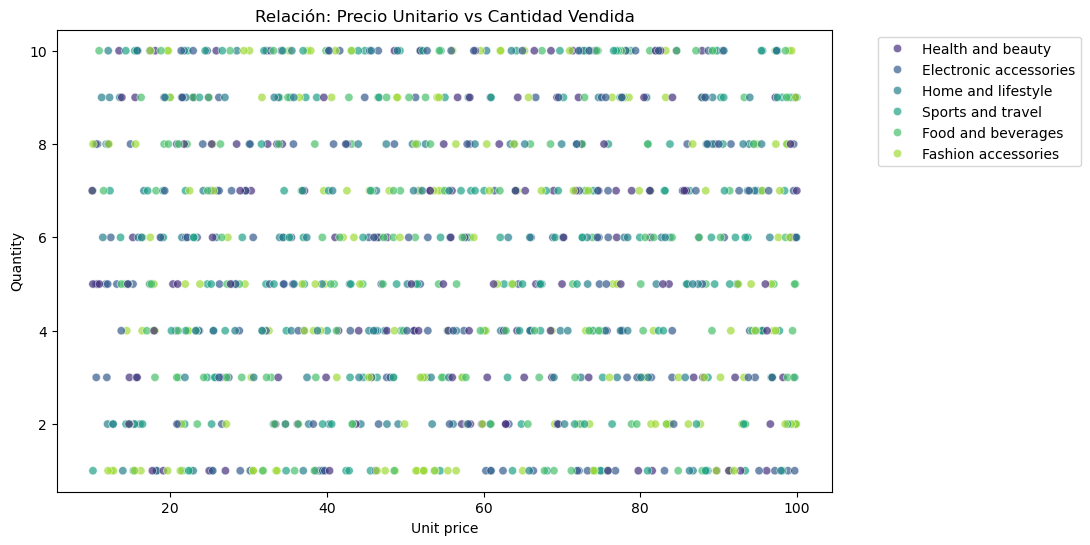

In [31]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Unit price", 
    y="Quantity", 
    data=df, 
    hue="Product line", 
    palette="viridis", 
    alpha=0.7
)
plt.title("Relación: Precio Unitario vs Cantidad Vendida")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("images/precio_vs_cantidad.png", bbox_inches="tight")
plt.show()

In [ ]:
## Resultados Clave 
4. **Productos más vendidos**: 
   - **Electrónicos** lideran las ventas (USD 56,220), seguidos de **Equipamiento deportivo** (USD 49,765).
5. **Mejor rating**: 
   - **Productos de salud y belleza** tienen el rating más alto (7.1/10).
6. **Relación precio-cantidad**: 
   - Productos más baratos (ej: alimentos) tienden a venderse en mayor cantidad.